In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import random
from datetime import datetime, timedelta

In [3]:
n = int(input(" "))
product_categories = ['Machinery', 'Tools', 'Components', 'Raw Materials','Electrical']
regions = ['North', 'South', 'East', 'West', 'Central']
customer_types = ['B2B', 'Government', 'Distributor', 'Retail']
sales_channels = ['Online', 'Retailer', 'Direct Sales','Offline']
START_DATE = datetime(2024, 1, 1)
NUM_DAYS = (datetime.now() - START_DATE).days
manufacturing_sales = {
    'Order_ID': np.arange(1001, 1001 + n),
    'Date': np.array([(START_DATE + timedelta(days=random.randint(0, NUM_DAYS))).strftime('%Y-%m-%d') for _ in range(n)]),
    'Product_Category': np.random.choice(product_categories, n),
    'Product_Name': np.random.choice(['Pump', 'Compressor', 'Welding Machine', 'Conveyor Belt','Drill', 'Motor', 'Valve', 'Gearbox'], n),
    'Region': np.random.choice(regions, n),
    'Customer_Type': np.random.choice(customer_types, n),
    'Units_Sold': np.random.randint(10, 200, n),
    'Unit_Price': np.random.randint(500, 5000, n),
    'Discount': np.random.uniform(0, 0.25, n).round(2),
    'Sales_Channel': np.random.choice(sales_channels, n)
}


 1001


In [4]:
df=pd.DataFrame(manufacturing_sales)
df

,Order_ID,Date,Product_Category,Product_Name,Region,Customer_Type,Units_Sold,Unit_Price,Discount,Sales_Channel
0,1001,2025-09-18,Components,Valve,East,Retail,106,3031,0.16,Online
1,1002,2025-02-10,Raw Materials,Drill,North,Distributor,88,2359,0.10,Direct Sales
2,1003,2024-08-31,Machinery,Pump,East,B2B,197,4636,0.16,Direct Sales
3,1004,2025-02-03,Machinery,Conveyor Belt,South,Retail,193,1901,0.11,Retailer
4,1005,2024-01-30,Machinery,Motor,West,Retail,165,3067,0.16,Offline
...,...,...,...,...,...,...,...,...,...,...
996,1997,2025-08-03,Raw Materials,Pump,East,Distributor,163,3514,0.10,Online
997,1998,2025-06-07,Components,Motor,Central,Government,174,3490,0.23,Retailer
998,1999,2024-03-10,Tools,Drill,Central,B2B,37,4579,0.07,Offline
999,2000,2025-06-09,Components,Drill,North,B2B,158,601,0.21,Direct Sales


In [5]:
df.to_csv("manufacturing_sales",index=False)

**5.Perform Exploratory Data Analysis (EDA) to derive below using above inputs with synthetic data created**

5.1 Univariate Analysis (Single Variable Insights)

In [6]:
df['Total_Sales']=df['Units_Sold']*df['Unit_Price']

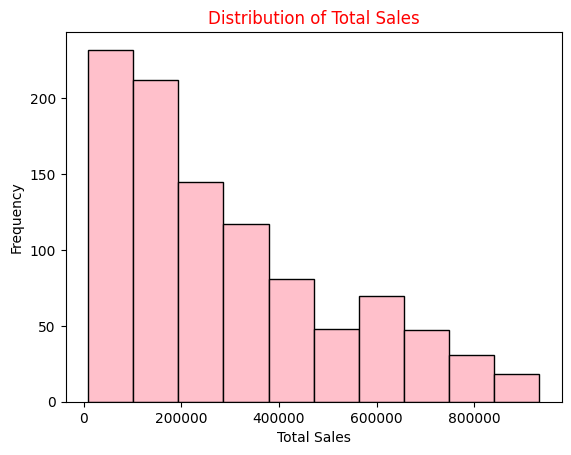

In [7]:
plt.hist(df['Total_Sales'],color='pink',edgecolor='k')
plt.xlabel('Total Sales')
plt.ylabel('Frequency')
plt.title('Distribution of Total Sales',color='red')
plt.show()

In [8]:
df['Profit']=df['Total_Sales']-(df['Total_Sales']*df['Discount'])

Text(0, 0.5, 'Profit Value (INR)')

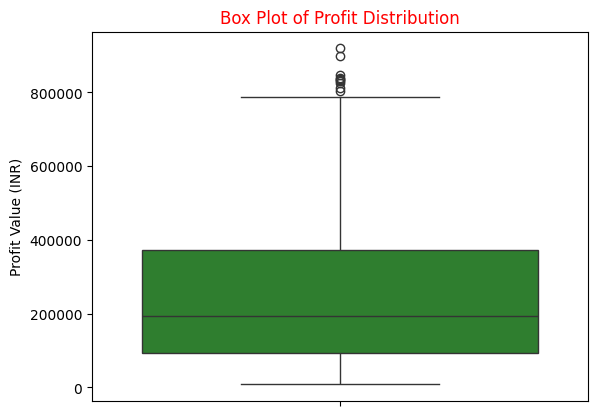

In [44]:
sns.boxplot(y=df['Profit'], color='forestgreen')
plt.title('Box Plot of Profit Distribution',color='red')
plt.ylabel('Profit Value (INR)')

/tmp/ipython-input-3161441382.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Product_Category', data=ME,order=ME['Product_Category'].value_counts().index,  palette=['green', 'yellow'])


Text(0.5, 1.0, 'Order Count Among Electrical VS Machinery')

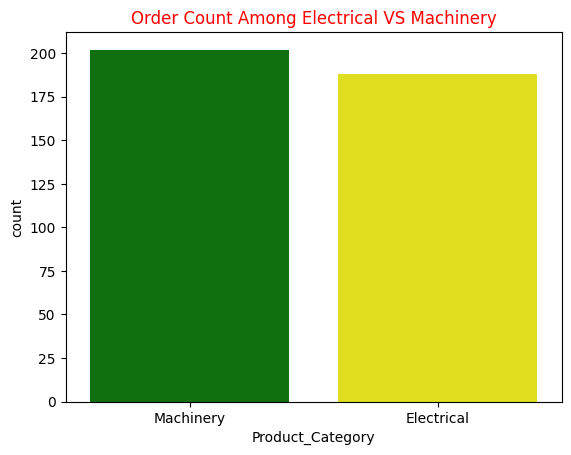

In [10]:
ME = df[df['Product_Category'].isin(['Machinery', 'Electrical'])]
sns.countplot(x='Product_Category', data=ME,order=ME['Product_Category'].value_counts().index,  palette=['green', 'yellow'])
plt.title("Order Count Among Electrical VS Machinery", color='red')

/tmp/ipython-input-3852113238.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Region', data=SW,order=SW['Region'].value_counts().index,  palette=['blue', 'k'])


Text(0.5, 1.0, 'Order Count Among South VS West')

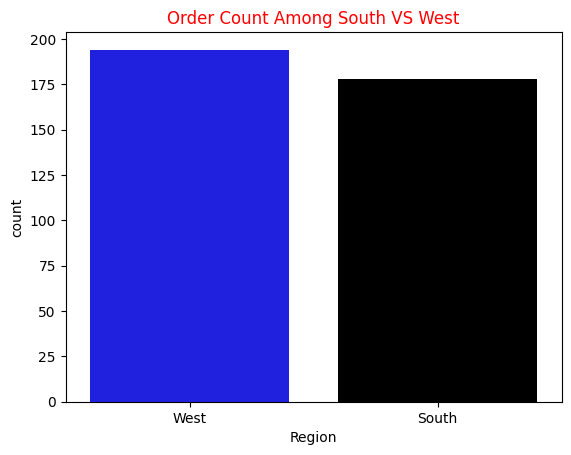

In [11]:
SW = df[df['Region'].isin(['South', 'West'])]
sns.countplot(x='Region', data=SW,order=SW['Region'].value_counts().index,  palette=['blue', 'k'])
plt.title("Order Count Among South VS West", color='red')

/tmp/ipython-input-2147844715.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Sales_Channel', y='Total_Sales', data=channel_sales, palette='Set1')


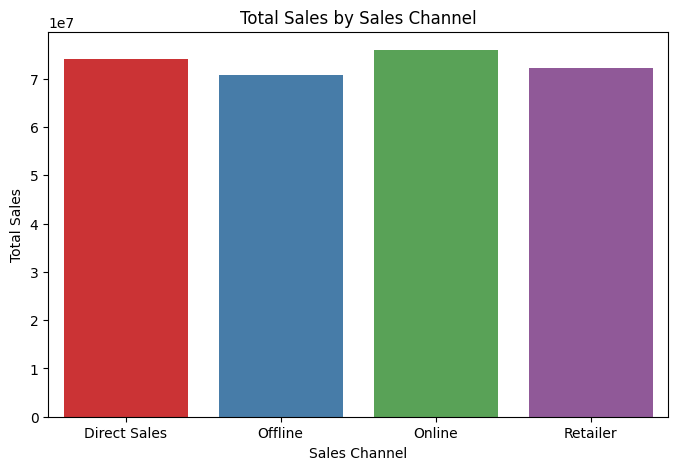

In [52]:
channel_sales = df.groupby('Sales_Channel')['Total_Sales'].sum().reset_index()
plt.figure(figsize=(8,5))
sns.barplot(x='Sales_Channel', y='Total_Sales', data=channel_sales, palette='Set1')
plt.title("Total Sales by Sales Channel")
plt.xlabel("Sales Channel")
plt.ylabel("Total Sales")
plt.show()

5.2 Bivariate Analysis (Relationships Between Two Variables)

Text(0, 0.5, 'Profit Value ')

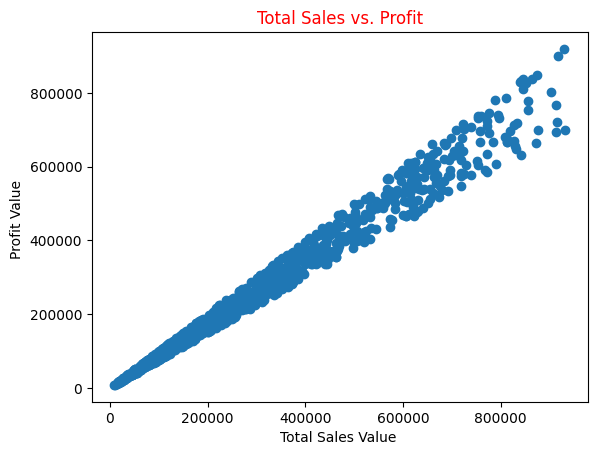

In [13]:
plt.scatter(df['Total_Sales'],df['Profit'])
plt.title('Total Sales vs. Profit',color='red')
plt.xlabel('Total Sales Value ')
plt.ylabel('Profit Value ')

([0, 1, 2, 3, 4],
 [Text(0, 0, 'Components'),
  Text(1, 0, 'Raw Materials'),
  Text(2, 0, 'Machinery'),
  Text(3, 0, 'Electrical'),
  Text(4, 0, 'Tools')])

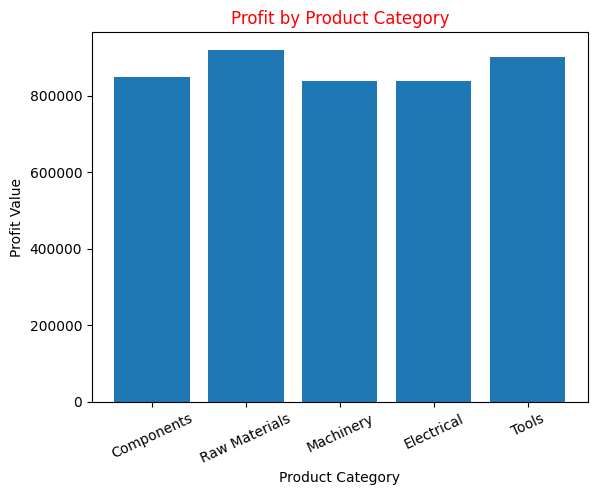

In [33]:
plt.bar(df['Product_Category'],df['Profit'])
plt.title('Profit by Product Category',color='red')
plt.xlabel('Product Category')
plt.ylabel('Profit Value')
plt.xticks(rotation=25)

([0, 1, 2, 3, 4],
 [Text(0, 0, 'East'),
  Text(1, 0, 'North'),
  Text(2, 0, 'South'),
  Text(3, 0, 'West'),
  Text(4, 0, 'Central')])

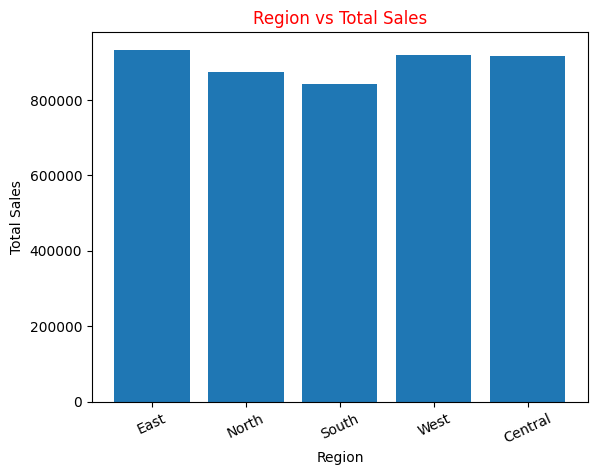

In [37]:
plt.bar(df['Region'],df['Total_Sales'])
plt.title('Region vs Total Sales',color='red')
plt.xlabel('Region')
plt.ylabel('Total Sales')
plt.xticks(rotation=25)

<Axes: xlabel='Customer_Type', ylabel='Profit'>

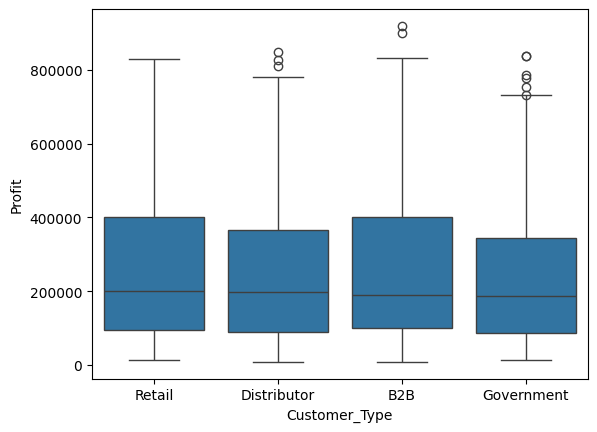

In [43]:
sns.boxplot(x='Customer_Type', y='Profit', data=df)

plt.title('Profit Distribution by Customer Type',color='red')
plt.xlabel('Customer Type')
plt.ylabel('Profit Value (INR)')
plt.xticks(rotation=15)
#plt.ticklabel_format(style='plain', axis='y')

Text(0, 0.5, 'Sales Types')

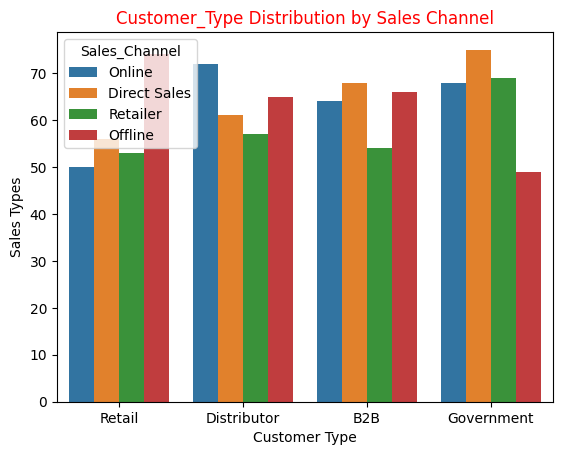

In [47]:
sns.countplot(x='Customer_Type', hue='Sales_Channel', data=df)
plt.title('Customer_Type Distribution by Sales Channel',color='red')
plt.xlabel('Customer Type')
plt.ylabel('Sales Types')

In [57]:
COST_PERCENTAGE = 0.60
df['Total_Sales'] = df['Units_Sold'] * df['Unit_Price'] * (1 - df['Discount'])
df['COGS'] = df['Units_Sold'] * df['Unit_Price'] * COST_PERCENTAGE
df['Profit'] = df['Total_Sales'] - df['COGS']
numeric_cols = ['Units_Sold', 'Unit_Price', 'Discount', 'Total_Sales', 'Profit']
corr_matrix = df[numeric_cols].corr()



print(f"Correlation Coefficient of Total_Sales & Profit: {corr_matrix.loc['Total_Sales', 'Profit']:.4f}\n")


print(f"Correlation Coefficient of Discount & Profit: {corr_matrix.loc['Discount', 'Profit']:.4f}\n")


print(f"Correlation Coefficient of Units_Sold & Total_Sales: {corr_matrix.loc['Units_Sold', 'Total_Sales']:.4f}\n")


print(f"Correlation Coefficient of Unit_Price & Profit: {corr_matrix.loc['Unit_Price', 'Profit']:.4f}")

Correlation Coefficient of Total_Sales & Profit: 0.9630

Correlation Coefficient of Discount & Profit: -0.3658

Correlation Coefficient of Units_Sold & Total_Sales: 0.7082

Correlation Coefficient of Unit_Price & Profit: 0.5831


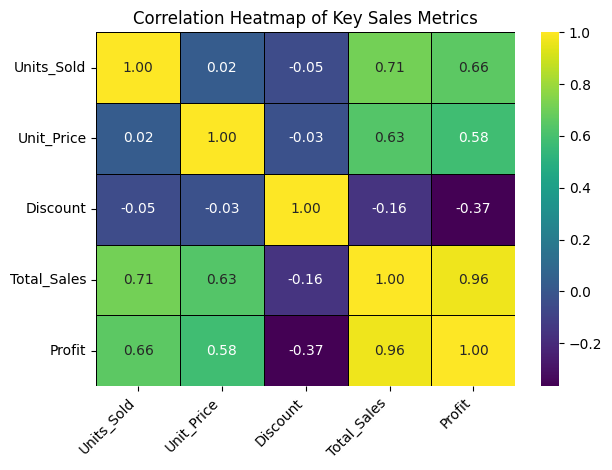

In [59]:
sns.heatmap(corr_matrix,  annot=True,fmt=".2f", cmap='viridis',cbar=True,linewidths=.5,linecolor='black')
plt.title('Correlation Heatmap of Key Sales Metrics')
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()
plt.show()

/tmp/ipython-input-2214190309.py:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_sales = df.set_index('Date').resample('M')['Total_Sales'].sum().reset_index()


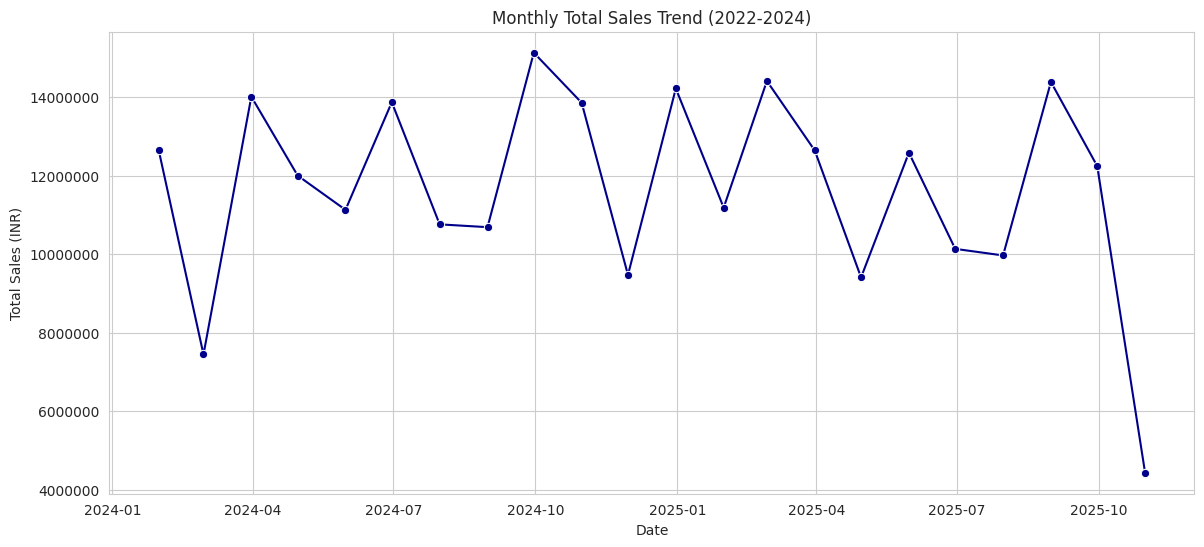

In [60]:
df['Date'] = pd.to_datetime(df['Date'])
monthly_sales = df.set_index('Date').resample('M')['Total_Sales'].sum().reset_index()
sns.set_style("whitegrid")
plt.figure(figsize=(14, 6))

sns.lineplot(x='Date', y='Total_Sales', data=monthly_sales, marker='o', color='darkblue')

plt.title('Monthly Total Sales Trend (2022-2024)')
plt.xlabel('Date')
plt.ylabel('Total Sales (INR)')
plt.ticklabel_format(style='plain', axis='y')

In [61]:
category_revenue = df.groupby('Product_Category')['Total_Sales'].sum().sort_values(ascending=False).reset_index()
total_revenue_sum = category_revenue['Total_Sales'].sum()
category_revenue['Percentage'] = (category_revenue['Total_Sales'] / total_revenue_sum * 100).round(2)

print(category_revenue)

  Product_Category  Total_Sales  Percentage
0    Raw Materials  56619138.76       22.06
1        Machinery  52499185.26       20.46
2       Components  52339091.32       20.40
3            Tools  50673231.53       19.75
4       Electrical  44492865.85       17.34


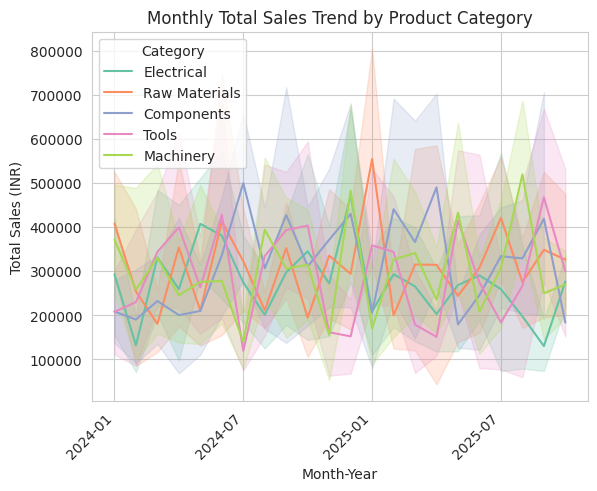

In [62]:
monthly_category_sales = df.groupby(['Date', 'Product_Category'])['Total_Sales'].sum().reset_index()
monthly_category_sales['MonthYear'] = monthly_category_sales['Date'].dt.to_period('M').astype(str)

sns.lineplot(x='MonthYear',  y='Total_Sales', hue='Product_Category',  data=monthly_category_sales, palette='Set2')
plt.title('Monthly Total Sales Trend by Product Category')
plt.xlabel('Month-Year')
plt.ylabel('Total Sales (INR)')
plt.ticklabel_format(style='plain', axis='y')
ticks = monthly_category_sales['MonthYear'].unique()
plt.xticks(ticks[::6], rotation=45, ha='right')
plt.legend(title='Category', loc='upper left')
